## Overselling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_hdf('overselling.h5', key = 'value_v2g')
df2 = pd.read_hdf('overselling_v2.h5', key = 'value_v2g')
df3 = pd.read_hdf('overselling_v3.h5', key = 'value_v2g')
df.index.freq = df.index.inferred_freq  # might also work if it's inferrable
df2.index.freq = df2.index.inferred_freq  # might also work if it's inferrable
df3.index.freq = df3.index.inferred_freq  # might also work if it's inferrable
scenarios = pd.read_hdf('scenarios.h5', key = 'value_v2g')
scenarios.index.freq = scenarios.index.inferred_freq  # might also work if it's inferrable

In [3]:
scenarios.tail()

base_case   no_losses  misspecified_losses  \
2019-12-27  138.274398  163.200903           133.051040   
2019-12-28  138.261311  163.487594           132.999534   
2019-12-29  138.249536  163.706365           133.044858   
2019-12-30  138.104893  164.233866           132.959469   
2019-12-31  137.590955  164.654681           132.295294   

            weaker_guarantee_and_exclusion  weaker_guarantee_and_penalty  \
2019-12-27                       15.347123                    295.274026   
2019-12-28                       15.347123                    293.980443   
2019-12-29                       15.347123                    293.801490   
2019-12-30                       14.521999                    295.231766   
2019-12-31                       13.696875                    295.884556   

            unidirectional  
2019-12-27       16.537916  
2019-12-28       16.537916  
2019-12-29       16.537916  
2019-12-30       15.779803  
2019-12-31       15.002856

In [4]:
df.tail()

exclusion    k5_py075   k10_py075   k65_py075   k70_py075  \
2019-12-27  15.347123  295.274026  283.103485  231.534436  228.151096   
2019-12-28  15.347123  293.980443  281.994311  231.540075  228.156735   
2019-12-29  15.347123  293.801490  281.825746  231.309333  227.925993   
2019-12-30  14.521999  295.231766  283.256021  231.746213  228.362873   
2019-12-31  13.696875  295.884556  283.741434  232.018556  228.635215   

            k100_py075    k5_py750  k5_py7500  
2019-12-27  207.851053  246.335935  -2.976369  
2019-12-28  207.856692  246.341574  -2.970730  
2019-12-29  207.625950  246.110832  -3.201472  
2019-12-30  208.062830  246.547712  -2.764592  
2019-12-31  208.335172  246.820055  -2.492250

In [5]:
df2.tail()

k200_py075
2019-12-27  157.862180
2019-12-28  157.868008
2019-12-29  157.637947
2019-12-30  158.083667
2019-12-31  158.332912

In [6]:
(296 - 247)/296

0.16554054054054054

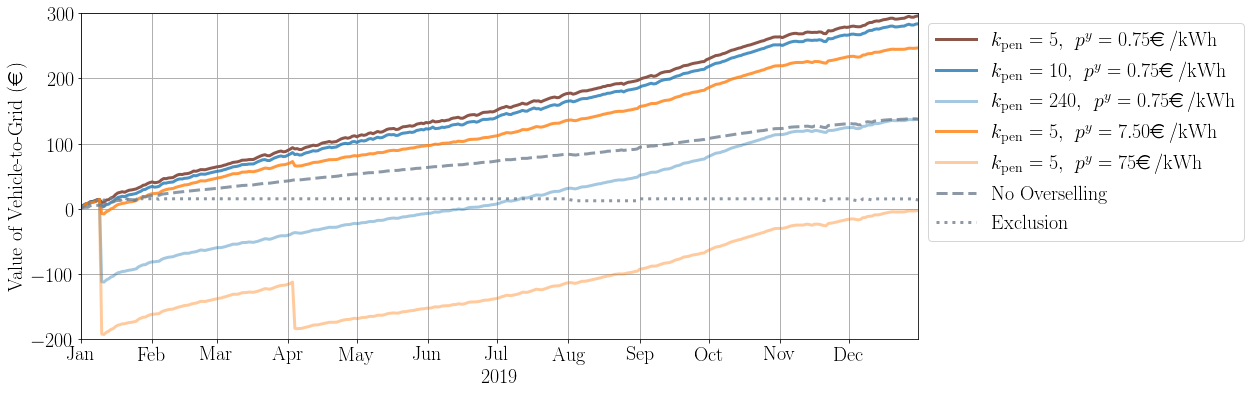

In [8]:
transp = 1
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{eurosym}')
fig = plt.figure(figsize=[15, 6])
plt.rcParams.update({'font.size': 20})
# fines
# - varying k
plt.plot(df.index, df['k5_py075'], '-', label='$k_{\mathrm{pen}} = 5, \; \, p^y = 0.75$\EUR/kWh', linewidth=3, alpha = 1, color = 'tab:brown')
plt.plot(df.index, df['k10_py075'], '-', label='$k_{\mathrm{pen}} = 10, \; \, p^y = 0.75$\EUR/kWh', linewidth=3, alpha = 0.8, color = 'tab:blue')
# plt.plot(df.index, df['k100_py075'], '-', label='$k_{\mathrm{pen}} = 100, \; \, p^y = 0.75$\EUR/kWh', linewidth=3, alpha = 0.6, color = 'tab:blue')
# plt.plot(df2.index, df2['k200_py075'], '-', label='$k_{\mathrm{pen}} = 200, \; \, p^y = 0.75$\EUR/kWh', linewidth=3, alpha = 0.2, color = 'tab:blue')
plt.plot(df3.index, df3['k240_py075'], '-', label='$k_{\mathrm{pen}} = 240, \; \, p^y = 0.75$\EUR/kWh', linewidth=3, alpha = 0.4, color = 'tab:blue')
# - varying py
plt.plot(df.index, df['k5_py750'], '-', label='$k_{\mathrm{pen}} = 5, \; \, p^y = 7.50$\EUR/kWh', linewidth=3, alpha = 0.8, color = 'tab:orange')
plt.plot(df.index, df['k5_py7500'], '-', label='$k_{\mathrm{pen}} = 5, \; \, p^y = 75$\EUR/kWh', linewidth=3, alpha = 0.4, color = 'tab:orange')
# base-case
plt.plot(scenarios.index, scenarios['base_case'], '--', label='No Overselling', linewidth=3, alpha = 0.8, color = 'slategrey')
# exclusion
plt.plot(df.index, df['exclusion'], ':', label='Exclusion', linewidth=3, alpha = 0.8, color = 'slategrey')
# layout
plt.grid(linewidth=1)
plt.ylim([-200, 300])
plt.xlim([df.index[0], df.index[-1]])
Tres = 'MS'
plt.xticks(pd.date_range('01-01-2019 00:00:00', '12-31-2019 23:30:00', freq= Tres), pd.date_range('01-01-2019 00:00:00', '12-31-2019 23:30:00', freq=Tres).strftime('%b'))
plt.xlabel('2019')
plt.ylabel(r'Value of Vehicle-to-Grid (\EUR)')
plt.legend(frameon=True,  bbox_to_anchor=(1,1), loc="upper left")
fig.savefig('overselling.pdf',bbox_inches='tight')

### Fines: on 17 out of 365 day (4.7% of the time)

In [39]:
fine = pd.read_hdf('overselling.h5', key = 'fine')
fine.index.freq = fine.index.inferred_freq  # might also work if it's inferrable
fine.dropna(axis=1, inplace = True)
fine = fine[(fine.T != 0).any()]

In [50]:
fine.describe()

k5_py075  k10_py075  k65_py075  k70_py075  k100_py075   k5_py750  \
count  17.000000  17.000000  17.000000  17.000000   17.000000  17.000000   
mean    0.741391   1.467186   2.587260   2.786280    3.980401   0.184807   
std     1.182241   2.368533  10.274317  11.064649   15.806642   0.629395   
min     0.058188   0.112141   0.000000   0.000000    0.000000   0.000000   
25%     0.264870   0.476478   0.000000   0.000000    0.000000   0.000000   
50%     0.333366   0.734805   0.000000   0.000000    0.000000   0.000000   
75%     0.880565   1.565500   0.000000   0.000000    0.000000   0.000000   
max     5.105545  10.216259  42.430783  45.694689   65.278127   2.596401   

       k5_py7500  
count  17.000000  
mean    0.184807  
std     0.629395  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     2.596401

### Fast Charger: on 7 out of 365 days (1.9% of the time) with low py, on 2 out of 365 days (0.5% of the time) with $p^y$ equal to 7.5€/kWh or 75€/kWh

In [52]:
fast_charger = pd.read_hdf('overselling.h5', key = 'fast_charger')
fast_charger.index.freq = fast_charger.index.inferred_freq  # might also work if it's inferrable
fast_charger.dropna(axis=1, inplace = True)
fast_charger = fast_charger[(fast_charger.T != 0).any()]

In [53]:
fast_charger

k5_py075  k10_py075  k65_py075  k70_py075  k100_py075   k5_py750  \
2019-01-10  2.053669   2.053669   2.053669   2.053669    2.053669  20.536692   
2019-03-22  0.035100   0.026835   0.000000   0.000000    0.000000   0.000000   
2019-04-04  2.050378   2.050378   0.000000   0.000000    0.000000   7.164675   
2019-06-04  2.031196   1.948015   0.000000   0.000000    0.000000   0.000000   
2019-07-18  0.873289   0.840421   0.000000   0.000000    0.000000   0.000000   
2019-10-30  0.204797   0.199808   0.000000   0.000000    0.000000   0.000000   
2019-12-03  0.258005   0.097885   0.000000   0.000000    0.000000   0.000000   

             k5_py7500  
2019-01-10  205.366922  
2019-03-22    0.000000  
2019-04-04   71.646749  
2019-06-04    0.000000  
2019-07-18    0.000000  
2019-10-30    0.000000  
2019-12-03    0.000000

In [55]:
2/365

0.005479452054794521